In [10]:
using Plots
using ForwardDiff
using QuadGK
using LinearAlgebra

In [11]:
include("src/plotters.jl")
include("src/interpolation.jl")
include("src/linesearch.jl")
include("src/transform.jl")
include("src/projection.jl");

In [12]:
function reparam_gradient(q, r)
    qdt(t) = ForwardDiff.derivative(q, t)
    rdt(t) = ForwardDiff.derivative(r, t)
    function (t)
        return r(t)⋅qdt(t) - q(t)⋅rdt(t)  # /diff_norm
    end
end

reparam_gradient (generic function with 1 method)

In [53]:
Xfine = 0:0.01:1
Xcoarse = 0:0.1:1

# Define my test functions
c1(t) = [t, 0]
ψ(t) = 0.5t^2 + 0.5t
c2 = c1 ∘ ψ

# c1(t) = [cos(2π*t), sin(2π*t)]
# c2 = c1 ∘ ψ



# ... and their derivatives
c1dt(t) = ForwardDiff.derivative(c1, t)
c2dt(t) = ForwardDiff.derivative(c2, t)
ψdt(t) = ForwardDiff.derivative(ψ, t)

# And get the q-maps of my test curves
q = Q_transform(c1, c1dt)
r = Q_transform(c2, c2dt)


∇E = reparam_gradient(q, r)

#203 (generic function with 1 method)

In [65]:
include("src/projection.jl")

basis_palais

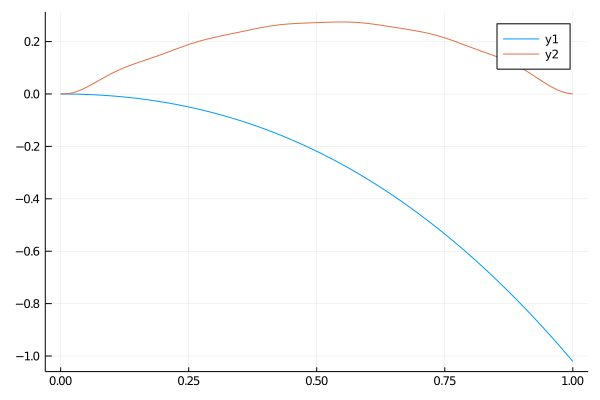

In [66]:
N = 11
basis = basis_palais(N)

p = plot(legend=false)
for bi in basis
    plot!(bi, Xfine)
end


W = [palais_inner_product(∇E, bi) for bi in basis]

f = build_function(W, basis)

plot(∇E, Xfine)
plot!(f, Xfine)